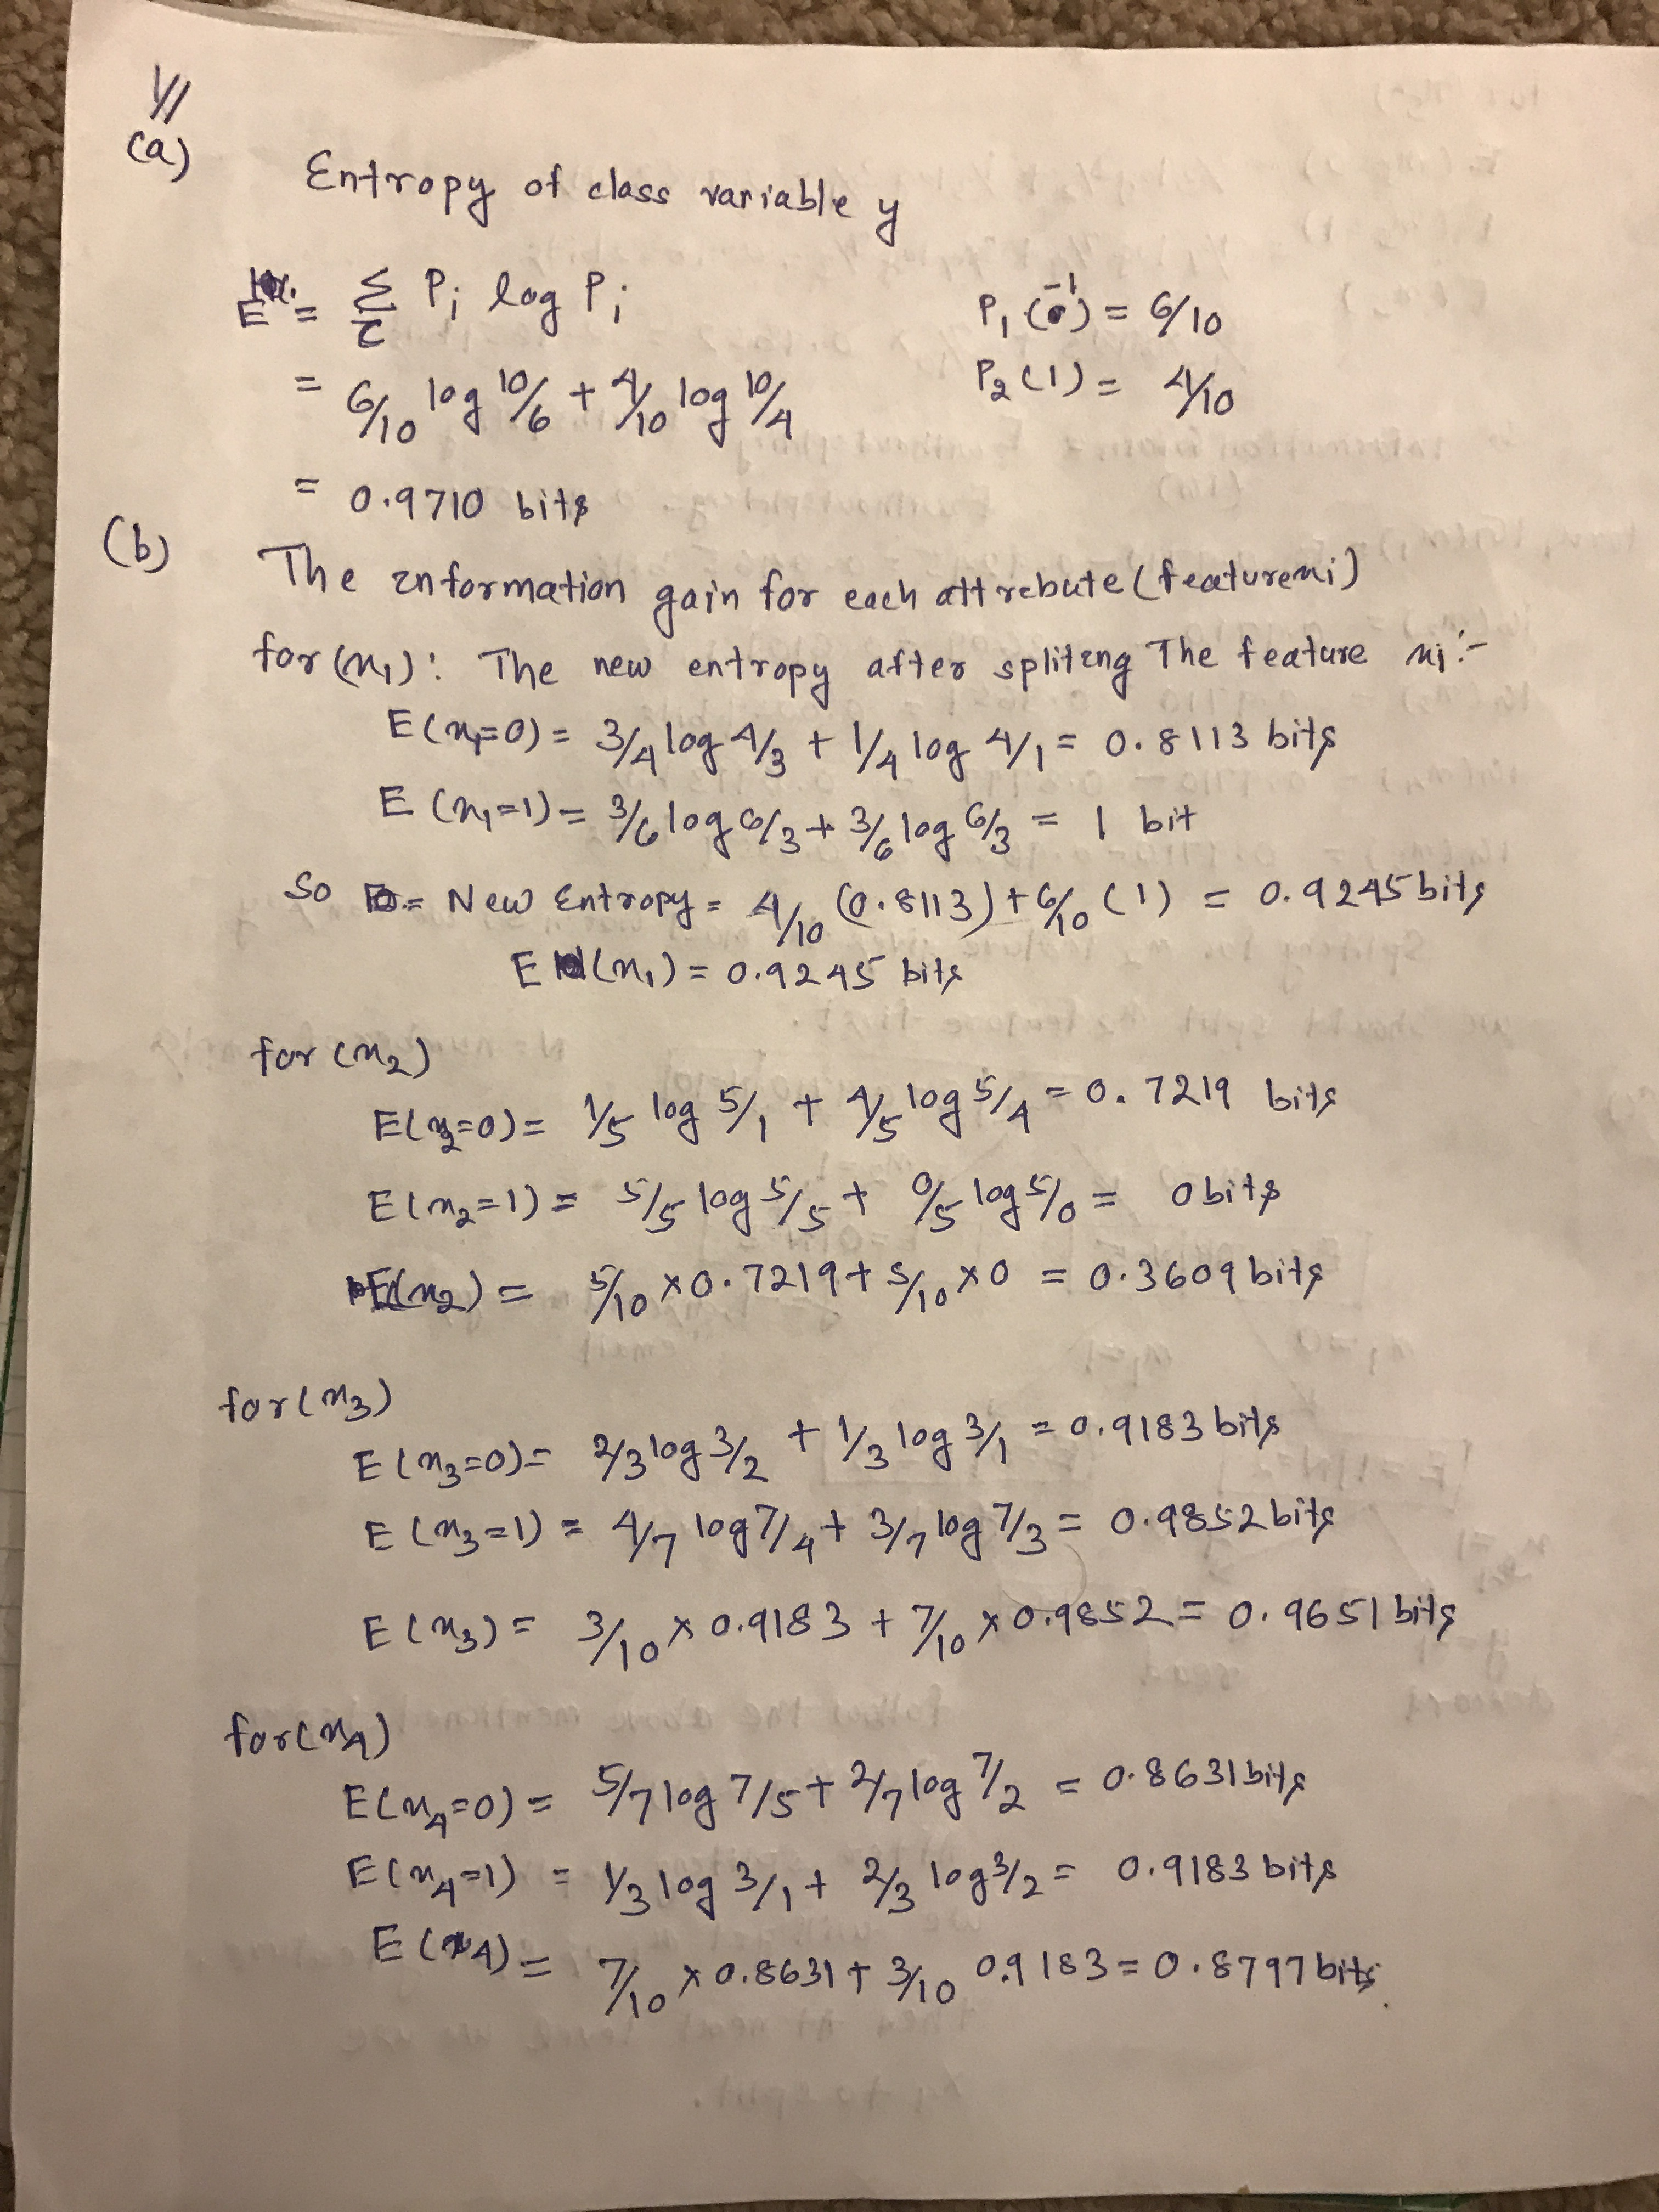

In [52]:
#1
from IPython.core.display import Image
Image(filename=('IMG_0803.JPG'))

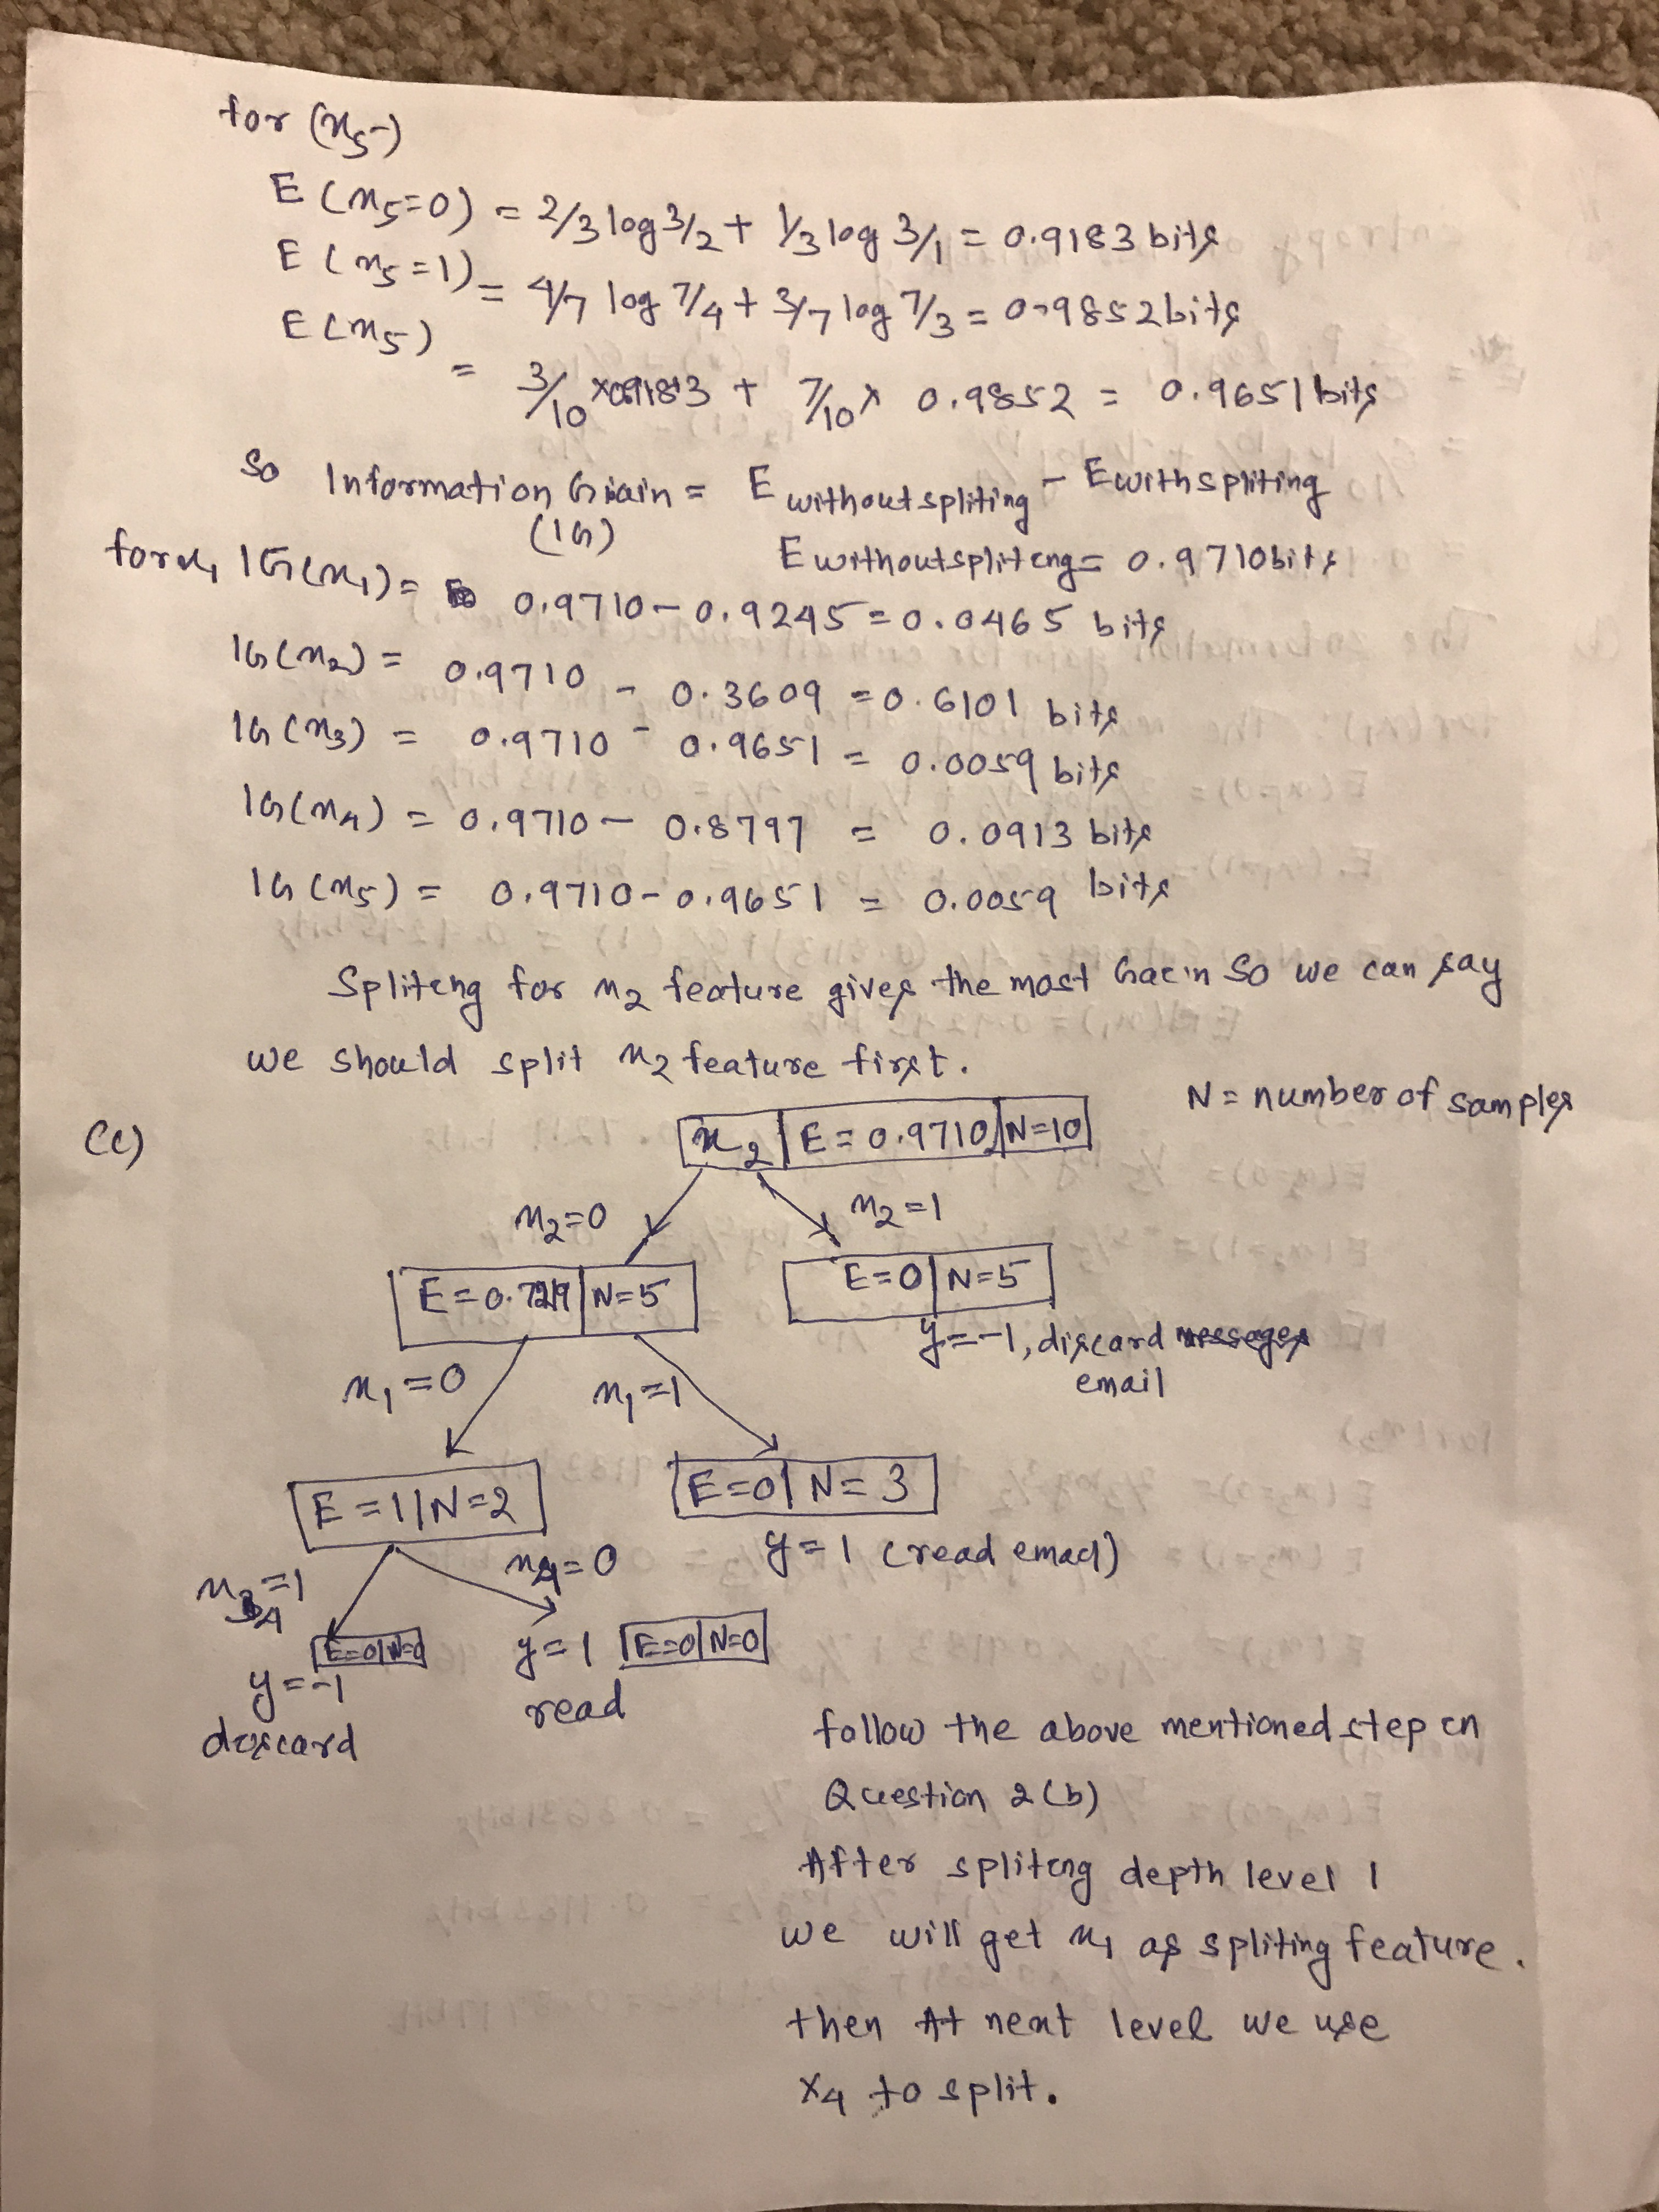

In [53]:
Image(filename=('IMG_0804.JPG'))

In [8]:
#2(a)
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
X_tr = np.genfromtxt("data/X_train.txt",delimiter=None)
X_te= X_tr[100001:120000,:]
X_tr= X_tr[0:100000,:]
Y_tr = np.genfromtxt("data/Y_train.txt",delimiter=None)
Y_te= Y_tr[100001:120000]

Y_tr= Y_tr[0:100000]
X_tr, Y_tr = ml.shuffleData(X_tr,Y_tr);


#X_tr, X_te, Y_tr, Y_te = ml.splitData(X_tr,Y_tr, .7);

#2(b)
dt = ml.dtree.treeClassify()
dt.train(X_tr,Y_tr, maxDepth=50)
Yhat_tr = dt.predict(X_tr)
Yhat_te = dt.predict(X_te)
error_tr =0

for j in range(0,Y_tr.shape[0]):
    if(Y_tr[j]!=Yhat_tr[j]):
        error_tr = error_tr +1
error_tr = error_tr*1.0/Y_tr.shape[0]*1.0
error_te = 0
for j in range(0,Y_te.shape[0]):
     if(Y_te[j]!=Yhat_te[j]):
        error_te = error_te +1
error_te = error_te*1.0/Y_te.shape[0]*1.0
print "Error on training data :"+ str(error_tr)
print "Error on validation testing data :"+ str(error_te)

Error on training data :0.06034
Error on validation testing data :0.314115705785


[ 1.  1.  1. ...,  0.  0.  0.]


In [ ]:
#2(c)
MSE_te = []
MSE_tr = []
for depth in range(0,15):
    dt.train(X_tr,Y_tr, maxDepth=depth)
    Yhat_tr = dt.predict(X_tr)
    Yhat_te = dt.predict(X_te)
    error_tr = 0
    for j in range(0,Y_tr.shape[0]):
        if(Y_tr[j]!=Yhat_tr[j]):
            error_tr = error_tr +1
    error_tr = error_tr*1.0/Y_tr.shape[0]*1.0
    MSE_tr.append(error_tr)
    error_te = 0
    for j in range(0,Y_te.shape[0]):
        if(Y_te[j]!=Yhat_te[j]):
            error_te = error_te +1
    error_te = error_te*1.0/Y_te.shape[0]*1.0
    MSE_te.append(error_te)

plt.plot(MSE_te,'g',label='MSE testing')
plt.plot(MSE_tr,'r',label='MSE training')
plt.grid(True)
#plt.legend(loc='upper down')
#6

I think error validation is less than full maxDepth(50).
Complexity increases with increase in death cut-off.
I think model starts overfitiing after depth 7. i will select depth=7 as best.

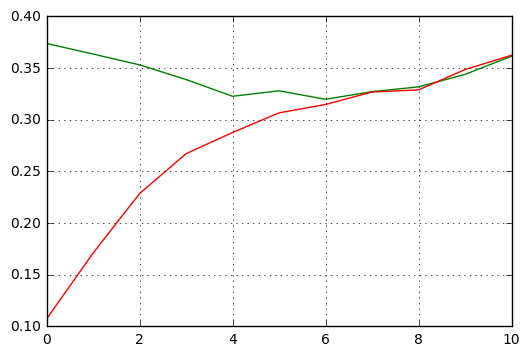

In [2]:
#2(d)
MSE_te = []
MSE_tr = []
for leaf in [2**y for y in range(2,13)]:
    dt.train(X_tr,Y_tr,minLeaf=leaf)
    Yhat_tr = dt.predict(X_tr)
    Yhat_te = dt.predict(X_te)
    error_tr = 0
    for j in range(0,Y_tr.shape[0]):
        if(Y_tr[j]!=Yhat_tr[j]):
            error_tr = error_tr +1
    error_tr = error_tr*1.0/Y_tr.shape[0]*1.0
    MSE_tr.append(error_tr)
    error_te = 0
    for j in range(0,Y_te.shape[0]):
        if(Y_te[j]!=Yhat_te[j]):
            error_te = error_te +1
    error_te = error_te*1.0/Y_te.shape[0]*1.0
    MSE_te.append(error_te)

plt.plot(MSE_te,'g',label='MSE testing')
plt.plot(MSE_tr,'r',label='MSE training')
plt.grid(True)
#plt.legend(loc='upper down')
plt.show()



complexity decreases with minleaf grows.
Model is starting to overfit after pos 6 which is 8, as it starts from 2,so my minLeaf = 2^8=256,so I will use 256 as minLeaf.

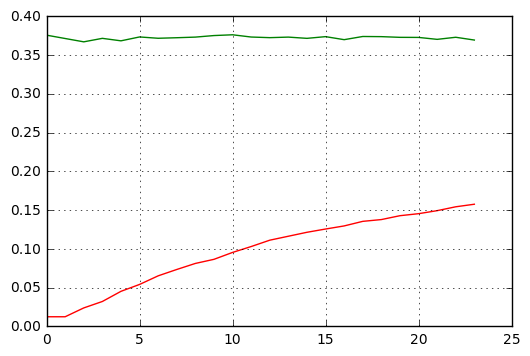

In [3]:
MSE_te = []
MSE_tr = []
for minparent in range(1,25):
    dt.train(X_tr,Y_tr, minParent=minparent)
    Yhat_tr = dt.predict(X_tr)
    Yhat_te = dt.predict(X_te)
    error_tr = 0
    for j in range(0,Y_tr.shape[0]):
        if(Y_tr[j]!=Yhat_tr[j]):
            error_tr = error_tr +1
    error_tr = error_tr*1.0/Y_tr.shape[0]*1.0
    MSE_tr.append(error_tr)
    error_te = 0
    for j in range(0,Y_te.shape[0]):
        if(Y_te[j]!=Yhat_te[j]):
            error_te = error_te +1
    error_te = error_te*1.0/Y_te.shape[0]*1.0
    MSE_te.append(error_te)
plt.plot(MSE_te,'g',label='MSE testing')
plt.plot(MSE_tr,'r',label='MSE training')
plt.grid(True)
plt.show()
#plt.legend(loc='upper down')
    

complexity control with minParent are similar minLeaf. Complexity decreases with minParent grows.

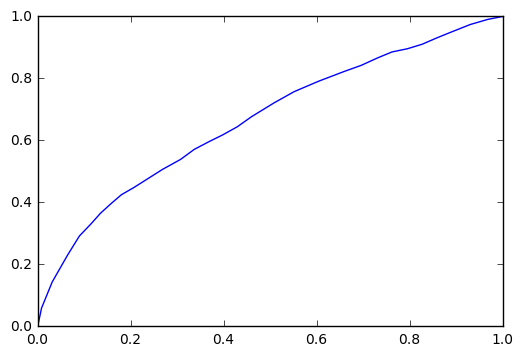

area under curve:val data0.665957424682


In [5]:
#2.(f)
dt.train(X_tr,Y_tr,maxDepth=7,minLeaf=256);
Yhat_te = dt.predict(X_te)
(falsepositive,truepositive,_)=dt.roc(X_te,Y_te);
plt.plot(falsepositive,truepositive)
plt.show()
auc_area=dt.auc(X_te,Y_te)
print "area under curve:val data"+ str(auc_area)

In [6]:
#2(g)
#dt.train(X_tr,Y_tr,maxDepth=10,minLeaf=256);
X_te_=np.genfromtxt("data/X_test.txt",delimiter=None);
Ypred = dt.predictSoft(X_te_)

np.savetxt('Yhat_knn200.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');


my final model's performance = 0.63930 .
AUC got from kaggle(Actual data) is less tan AUC got from above validation data

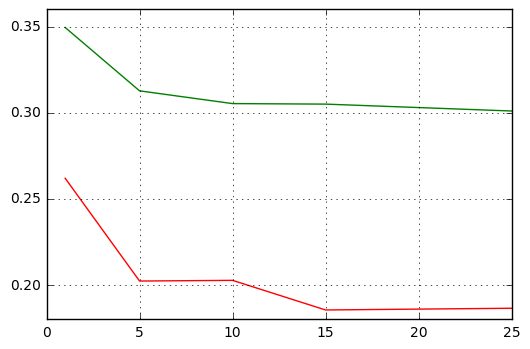

In [43]:
#3(a)
MSE_te = []
MSE_tr = []
X_tr = np.genfromtxt("data/X_train.txt",delimiter=None)
X_te= X_tr[10001:20000,:]
X_tr= X_tr[0:10000,:]
Y_tr = np.genfromtxt("data/Y_train.txt",delimiter=None)
Y_te= Y_tr[10001:20000]
Y_tr= Y_tr[0:10000]

#X_tr, Y_tr = ml.shuffleData(X_tr,Y_tr);
#X_tr, X_te, Y_tr, Y_te = ml.splitData(X_tr,Y_tr, .7);
tr_size =  X_tr.shape[0]
#print tr_size
no_feature = X_tr.shape[1]
#print no_feature
nfeatures=int(np.sqrt(no_feature))
#print nfeatures
te_size =  X_te.shape[0]
#print te_size
#ensemble_=[50,100,150,200,250,300,350,400,450,500]
ensemble_=[1,5,10,15,25]
for num in ensemble_:
    ensemble=[None]*num
    pred_te_matrix=np.zeros((te_size,num))
    pred_tr_matrix=np.zeros((tr_size,num))
    #it will store Yhat_tr and Yhat_te value in a 2-d array for every iteration
    for i in range(0,num):
        X_boot,Y_boot=ml.utils.bootstrapData(X_tr,Y_tr)#taking same argument M'=M
        ensemble[i]=ml.dtree.treeClassify()
        ensemble[i].train(X_boot,Y_boot,maxDepth=15,minLeaf = 4,nFeatures=nfeatures)
        
        pred_tr_matrix[:,i] = ensemble[i].predict(X_tr)
        pred_te_matrix[:,i] = ensemble[i].predict(X_te)
     
    pred_tr_matrix = np.mean(pred_tr_matrix, axis=1) > 0.5
    #if >0.5 max vot is with 1 or if <0.5 max vote is with 0
    pred_te_matrix = np.mean(pred_te_matrix, axis=1) > 0.5
    error_tr =0
    for j in range(0,Y_tr.shape[0]):
        if(Y_tr[j]!=pred_tr_matrix[j]):
            error_tr = error_tr +1
    error_tr = error_tr*1.0/Y_tr.shape[0]*1.0
    MSE_tr.append(error_tr)
    error_te = 0
    for j in range(0,Y_te.shape[0]):
        if(Y_te[j]!=pred_te_matrix[j]):
            error_te = error_te +1
    error_te = error_te*1.0/Y_te.shape[0]*1.0
    MSE_te.append(error_te)
ensemble=[1,5,10,15,25]
plt.plot(ensemble,MSE_te,'g',label='MSE testing')
plt.plot(ensemble,MSE_tr,'r',label='MSE training')
plt.grid(True)
plt.show()
#auc_area=dt.auc(X_te,Y_te)
#print "area under curve:val data"+ str(auc_area)

In [49]:
#3(b)
num = 25
X_te_=np.genfromtxt("data/X_test.txt",delimiter=None);
te_size =  X_te_.shape[0]
ensemble=[None]*num
pred_te_matrix=np.zeros((te_size,num))
pred_tr_matrix=np.zeros((tr_size,num))
#it will store Yhat_tr and Yhat_te value in a 2-d array for every iteration
for i in range(0,num):
    X_boot,Y_boot=ml.utils.bootstrapData(X_tr,Y_tr)#taking same argument M'=M
    ensemble[i]=ml.dtree.treeClassify()
    ensemble[i].train(X_boot,Y_boot,maxDepth=15,minLeaf = 4,nFeatures=nfeatures)
    pred_te_matrix[:,i] = ensemble[i].predict(X_te_)
     
Ypred = np.mean(pred_te_matrix, axis=1) > 0.5
#if >0.5 max vot is with 1 or if <0.5 max vote is with 0
#Ypred = pred_te_matrix


np.savetxt('Yhat_knn200.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');
print "finished"

finished


AUC for ensemble is 0.57833